In [24]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [163]:
boston = load_boston()
data = pd.DataFrame(boston.data)

In [164]:
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [165]:
# Convert to DMatrix used by xgboost
data['PRICE'] = boston.target

#DMdata = xgb.DMatrix(data = data.iloc[:, :-1], label = data.iloc[:, -1])

In [166]:
print("Dataset has {} entries and {} features".format(*data.shape))

Dataset has 506 entries and 14 features


In [167]:
# Extract the features and the target from our dataset
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [168]:
# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=123)

In [169]:
# Load data into DMatrix

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [170]:
# Building a Baseline Model

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)

In [171]:
# Predictions
preds

array([10.670782 , 17.886362 , 23.993221 , 10.971137 , 20.656567 ,
       17.063112 , 17.413216 ,  7.1758337, 11.684821 , 17.894796 ,
       18.901701 , 14.567413 , 10.806006 , 15.261372 , 12.66772  ,
       14.075861 , 13.288725 , 24.107811 , 13.454856 , 11.560353 ,
       11.525483 , 11.551982 , 19.228527 , 23.993221 , 20.524649 ,
       13.448225 , 10.661165 , 15.404765 , 16.191902 , 13.140589 ,
       14.916252 , 21.076527 ,  8.176096 , 14.827184 , 15.909969 ,
       21.041925 , 16.428032 ,  9.314631 , 12.319548 , 23.573265 ,
       18.292862 , 13.454856 ,  9.351014 , 22.248753 , 13.000366 ,
       16.475197 , 14.159811 , 15.230242 , 12.319548 , 11.772567 ,
       21.076527 , 16.024069 , 14.159811 ,  8.882479 , 13.588928 ,
       10.661165 , 11.776985 ,  7.1758337, 19.659273 ,  9.299877 ,
       12.806547 , 13.811639 , 11.339502 , 13.683961 , 14.075861 ,
       16.993258 , 16.206121 , 12.02784  , 15.3576   , 18.292862 ,
       13.223848 , 16.329927 , 12.808572 , 16.679268 , 11.4762

In [172]:
# Check Mean Squared Error and Root Mean Squared Error

print("MSE:" + str(mean_squared_error(preds, y_test)))
print("RMSE:" + str(np.sqrt(mean_squared_error(preds, y_test))))
print("Avg Predicted Price:" + str(np.mean(preds)))
print("Avg Price:" + str(np.mean(y_test)))

MSE:108.64399078990162
RMSE:10.423242815453433
Avg Predicted Price:14.763816
Avg Price:23.158823529411773


In [293]:
# Tuning Hyperparameters

params = {
    'max_depth':6,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'reg:squarederror',
    'eta':.3
}

params['eval_metric'] = "rmse"
num_boost_round = 999

In [253]:
# Building Model

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=25
)

[0]	Test-rmse:17.65278
[1]	Test-rmse:12.81492
[2]	Test-rmse:9.49895
[3]	Test-rmse:7.20098
[4]	Test-rmse:5.77900
[5]	Test-rmse:4.95811
[6]	Test-rmse:4.38778
[7]	Test-rmse:4.06011
[8]	Test-rmse:3.84122
[9]	Test-rmse:3.78244
[10]	Test-rmse:3.80386
[11]	Test-rmse:3.82255
[12]	Test-rmse:3.77964
[13]	Test-rmse:3.74070
[14]	Test-rmse:3.74505
[15]	Test-rmse:3.73599
[16]	Test-rmse:3.73692
[17]	Test-rmse:3.74990
[18]	Test-rmse:3.77849
[19]	Test-rmse:3.80831
[20]	Test-rmse:3.83557
[21]	Test-rmse:3.83736
[22]	Test-rmse:3.84088
[23]	Test-rmse:3.82078
[24]	Test-rmse:3.81719
[25]	Test-rmse:3.82228
[26]	Test-rmse:3.82583
[27]	Test-rmse:3.83179
[28]	Test-rmse:3.83909
[29]	Test-rmse:3.83991
[30]	Test-rmse:3.84495
[31]	Test-rmse:3.83972
[32]	Test-rmse:3.84527
[33]	Test-rmse:3.85952
[34]	Test-rmse:3.86578
[35]	Test-rmse:3.86921
[36]	Test-rmse:3.86864
[37]	Test-rmse:3.86508
[38]	Test-rmse:3.86284
[39]	Test-rmse:3.86631


In [175]:
# Print best round

print("Best RMSE: {:.2f} with {} rounds".format(model.best_score, model.best_iteration+1))

Best RMSE: 3.74 with 16 rounds


In [176]:
# Cross-validation. Test set is not required because the cv function splits the train dataset into nfolds and 
# iteratively keeps one of the folds for test purposes

cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
)
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.025243,0.103913,17.039882,0.367985
1,12.309840,0.078294,12.388473,0.307830
2,9.003990,0.056860,9.198213,0.383126
3,6.678546,0.058168,7.008292,0.441163
4,5.019752,0.039736,5.545621,0.518641
5,3.844615,0.030515,4.662851,0.490145
6,3.008611,0.036340,4.129234,0.416688
7,2.426476,0.043530,3.804573,0.389872
8,2.033743,0.054611,3.629329,0.364251
9,1.740455,0.060829,3.533159,0.333216


In [177]:
# Get the best RMSE score from cv and index 

print("Best RMSE: " + str(cv_results['test-rmse-mean'].min()))
print("Index: " + str(cv_results['test-rmse-mean'].argmin()))

Best RMSE: 3.2996542
Index: 39


In [178]:
# Grid search to tune additional parameters

gridsearch_params = [
    (max_depth, min_child_weight, subsample, colsample, eta)
    for max_depth in range(4,10,2)
    for min_child_weight in range(0,4)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
    for eta in [.5, .3, .1, .05, .005]
]

gridsearch_params

[(4, 0, 0.7, 0.7, 0.5),
 (4, 0, 0.7, 0.7, 0.3),
 (4, 0, 0.7, 0.7, 0.1),
 (4, 0, 0.7, 0.7, 0.05),
 (4, 0, 0.7, 0.7, 0.005),
 (4, 0, 0.7, 0.8, 0.5),
 (4, 0, 0.7, 0.8, 0.3),
 (4, 0, 0.7, 0.8, 0.1),
 (4, 0, 0.7, 0.8, 0.05),
 (4, 0, 0.7, 0.8, 0.005),
 (4, 0, 0.7, 0.9, 0.5),
 (4, 0, 0.7, 0.9, 0.3),
 (4, 0, 0.7, 0.9, 0.1),
 (4, 0, 0.7, 0.9, 0.05),
 (4, 0, 0.7, 0.9, 0.005),
 (4, 0, 0.7, 1.0, 0.5),
 (4, 0, 0.7, 1.0, 0.3),
 (4, 0, 0.7, 1.0, 0.1),
 (4, 0, 0.7, 1.0, 0.05),
 (4, 0, 0.7, 1.0, 0.005),
 (4, 0, 0.8, 0.7, 0.5),
 (4, 0, 0.8, 0.7, 0.3),
 (4, 0, 0.8, 0.7, 0.1),
 (4, 0, 0.8, 0.7, 0.05),
 (4, 0, 0.8, 0.7, 0.005),
 (4, 0, 0.8, 0.8, 0.5),
 (4, 0, 0.8, 0.8, 0.3),
 (4, 0, 0.8, 0.8, 0.1),
 (4, 0, 0.8, 0.8, 0.05),
 (4, 0, 0.8, 0.8, 0.005),
 (4, 0, 0.8, 0.9, 0.5),
 (4, 0, 0.8, 0.9, 0.3),
 (4, 0, 0.8, 0.9, 0.1),
 (4, 0, 0.8, 0.9, 0.05),
 (4, 0, 0.8, 0.9, 0.005),
 (4, 0, 0.8, 1.0, 0.5),
 (4, 0, 0.8, 1.0, 0.3),
 (4, 0, 0.8, 1.0, 0.1),
 (4, 0, 0.8, 1.0, 0.05),
 (4, 0, 0.8, 1.0, 0.005),
 (4, 0, 0.9, 0.7

In [179]:
params

{'max_depth': 6,
 'min_child_weight': 1,
 'subsample': 1,
 'colsample_bytree': 1,
 'objective': 'reg:squarederror',
 'eta': 0.3,
 'eval_metric': 'rmse'}

In [286]:
# Run Cross-Validation on the above pairs

# Define initial best params and MAE
min_rmse = float("Inf") # Set initial value to a high value (gets updated below)
best_params = None

for max_depth, min_child_weight, subsample, colsample, eta in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}, subsample={}, colsample={}, eta={}".format(
        max_depth, min_child_weight, subsample, colsample, eta))
    
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    params['eta'] = eta
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
        
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min() # best round from cv
    boost_rounds = cv_results['test-rmse-mean'].argmin() # index of the best round from cv
    
    print("\tRMSE {} for {} rounds \n".format(mean_rmse, boost_rounds))
    
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth, min_child_weight, subsample, colsample, eta, boost_rounds)
        
print("Best params: max_depth={}, min_child_weight={}, subsample={}, colsample={}, eta={}, boost_rounds={}, RMSE: {}".format(best_params[0], 
       best_params[1], best_params[2], best_params[3], best_params[4], best_params[5], min_rmse))

CV with max_depth=4, min_child_weight=0, subsample=0.7, colsample=0.7, eta=0.5
	RMSE 3.7199929999999997 for 18 rounds 

Best params: max_depth=4, min_child_weight=0, subsample=0.7, colsample=0.7, eta=0.5, boost_rounds=18, RMSE: 3.7199929999999997


In [ ]:
#Best params: 4, 3,  0.8, 0.8, 0.1, RMSE: 2.9742156
#CV with max_depth=4, min_child_weight=3, subsample=0.8, colsample=0.8, eta=0.1
#RMSE 2.9742156 for 182 rounds 

In [302]:
# Update params with best params above

params['max_depth'] = 4
params['min_child_weight'] = 3
params['subsample'] = 0.8
params['colsample_bytree'] = 0.8
params['eta'] = 0.1

'''
params = {
    'max_depth':6,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'reg:squarederror',
    'eta':.3
}
'''


params

{'max_depth': 4,
 'min_child_weight': 3,
 'subsample': 0.8,
 'colsample_bytree': 0.8,
 'objective': 'reg:squarederror',
 'eta': 0.1,
 'eval_metric': 'rmse'}

Saving your model

Although we found the best number of rounds, our model has been trained with more rounds than optimal, thus before using it for predictions, we should retrain it with the good number of rounds. Since we now the exact best num_boost_round, we don't need the early_stopping_round anymore.


In [303]:
# Retraining with optimal parameters

num_boost_round = model.best_iteration + 1  # From before (above)

better_model = xgb.train(
    params,
    dtrain,
    num_boost_round=182,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:22.19364
[1]	Test-rmse:20.24426
[2]	Test-rmse:18.49786
[3]	Test-rmse:16.86844
[4]	Test-rmse:15.45668
[5]	Test-rmse:14.22103
[6]	Test-rmse:12.96168
[7]	Test-rmse:11.89003
[8]	Test-rmse:11.01029
[9]	Test-rmse:10.11364
[10]	Test-rmse:9.34770
[11]	Test-rmse:8.69301
[12]	Test-rmse:8.05693
[13]	Test-rmse:7.54019
[14]	Test-rmse:7.06189
[15]	Test-rmse:6.61843
[16]	Test-rmse:6.25311
[17]	Test-rmse:5.93910
[18]	Test-rmse:5.70184
[19]	Test-rmse:5.50905
[20]	Test-rmse:5.33831
[21]	Test-rmse:5.17950
[22]	Test-rmse:5.08952
[23]	Test-rmse:5.00466
[24]	Test-rmse:4.94081
[25]	Test-rmse:4.86412
[26]	Test-rmse:4.82415
[27]	Test-rmse:4.75742
[28]	Test-rmse:4.72313
[29]	Test-rmse:4.65952
[30]	Test-rmse:4.58673
[31]	Test-rmse:4.56464
[32]	Test-rmse:4.54730
[33]	Test-rmse:4.52872
[34]	Test-rmse:4.52584
[35]	Test-rmse:4.50271
[36]	Test-rmse:4.48438
[37]	Test-rmse:4.46468
[38]	Test-rmse:4.44252
[39]	Test-rmse:4.43187
[40]	Test-rmse:4.41911
[41]	Test-rmse:4.39662
[42]	Test-rmse:4.39956
[43]	Test-r

In [329]:
# Check RMSE
np.sqrt(mean_squared_error(better_model.predict(dtest), y_test))

4.330667521296347

In [309]:
# Compare predictions
df_test = pd.DataFrame({'better_model': better_model.predict(dtest), 'original_model': model.predict(dtest), 'target': y_test})
df_test['bm_diff'] = abs(df_test['target'] - df_test['better_model'])
df_test['om_diff'] = abs(df_test['target'] - df_test['original_model'])
print(str(np.mean(df_test['bm_diff'])))
print(str(np.mean(df_test['om_diff'])))

2.384717096066943
2.366822734533572


In [317]:
df_test

,better_model,original_model,target,bm_diff,om_diff
410,24.852770,28.918505,15.0,9.852770,13.918505
85,25.432844,26.405285,26.6,1.167156,0.194715
280,46.139202,47.244946,45.4,0.739202,1.844946
422,18.526775,19.775171,20.8,2.273225,1.024829
199,31.998510,30.816896,34.9,2.901490,4.083104
...,...,...,...,...,...
229,33.956676,32.964348,31.5,2.456676,1.464348
159,27.038132,27.939930,23.3,3.738132,4.639930
196,37.576809,37.149212,33.3,4.276809,3.849212
345,18.393732,19.181248,17.5,0.893732,1.681248


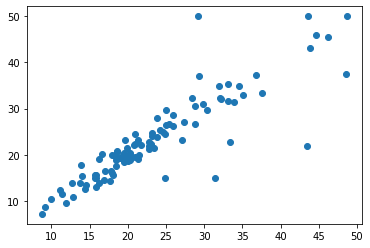

In [318]:
import matplotlib.pyplot as plt

plt.scatter(df_test['better_model'], df_test['target'])

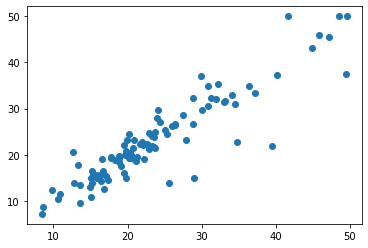

In [319]:
plt.scatter(df_test['original_model'], df_test['target'])

In [323]:
np.sqrt(mean_squared_error(better_model.predict(dtrain), y_train))

1.4066376406203354

In [324]:
np.sqrt(mean_squared_error(model.predict(dtrain), y_train))

0.2625539965723156

In [ ]:
plt.scatter(df_test['better_model'], df_test['target'])

In [325]:
# Compare predictions
df_train = pd.DataFrame({'better_model': better_model.predict(dtrain), 'original_model': model.predict(dtrain), 'target': y_train})
df_train['bm_diff'] = abs(df_train['target'] - df_train['better_model'])
df_train['om_diff'] = abs(df_train['target'] - df_train['original_model'])
print(str(np.mean(df_train['bm_diff'])))
print(str(np.mean(df_train['om_diff'])))

1.060933110501507
0.18953408793647689


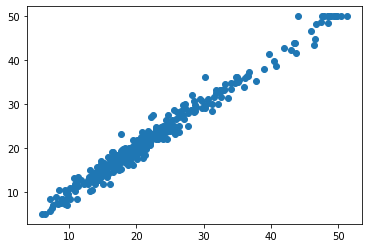

In [326]:
plt.scatter(df_train['better_model'], df_train['target'])

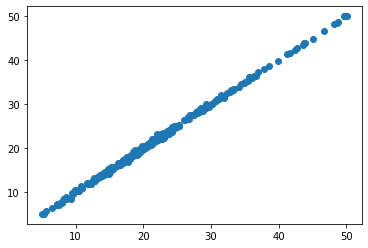

In [328]:
plt.scatter(df_train['original_model'], df_train['target'])

In [297]:
# Save model
better_model.save_model("xbg_pred_model.model")

In [298]:
# Load model and test on other test data

loaded_model = xgb.Booster()
loaded_model.load_model("xbg_pred_model.model")

# Use it for predictions.
loaded_model.predict(dtest)

array([24.85277  , 25.432844 , 46.139202 , 18.526775 , 31.99851  ,
       43.416645 , 25.864288 ,  8.793786 , 17.9816   , 28.46544  ,
       23.221403 , 19.448378 , 14.470288 , 27.352032 , 19.696505 ,
       20.324982 , 20.927742 , 43.810184 , 18.344545 , 16.217628 ,
       15.757869 , 29.218576 , 36.77053  , 44.624516 , 43.562656 ,
       22.773579 , 15.706867 , 20.951994 , 19.817547 , 20.062107 ,
       24.96727  , 32.181442 , 12.879614 , 21.464529 , 23.403723 ,
       29.844254 , 24.571236 , 14.000898 , 15.83842  , 48.520058 ,
       29.363642 , 18.461988 , 23.793106 , 48.630154 , 17.646961 ,
       22.739965 , 19.367863 , 23.110342 , 15.898752 , 31.371685 ,
       32.114006 , 24.955667 , 19.506435 , 11.154901 , 21.372509 ,
       15.896258 , 13.93598  ,  9.1703615, 33.077557 , 11.453088 ,
       20.142942 , 18.529837 , 18.074104 , 20.293161 , 21.295069 ,
       22.986738 , 23.122    , 17.944782 , 22.81853  , 28.805735 ,
       20.318142 , 24.897175 , 17.056229 , 25.981506 , 17.8171